<a href="https://colab.research.google.com/github/sbht04/ai-agents/blob/main/Pinecone_Vector_db.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pinecone Vector Database Demo**

### **Objective:**
In this notebook, you will learn how to **set up and use Pinecone**, a vector database, to perform **semantic search** using vector embeddings. This notebook will guide you through:

1. **Setting up Pinecone** by creating an index and configuring it to store embeddings.
2. **Adding data** to the database, such as sample text and categorization.
3. **Performing semantic search** to find records similar to a query, based on vector similarity.

By the end of this demo, you will understand the basics of using vector databases for real-time information retrieval and their integration with AI models.

\

---

### **What is Pinecone?**

**Pinecone** is a **vector database** designed to store and query vector embeddings. Vector databases are essential for applications that involve **semantic search**, **recommendation systems**, and **real-time information retrieval**. Unlike traditional databases, which rely on exact matches, **Pinecone** helps you search for **similarities** between vectors in a high-dimensional space, allowing you to efficiently retrieve the most relevant information.

### **Why Use Pinecone?**

Pinecone simplifies the challenges of managing high-dimensional data:
- **Scalability**: Automatically scales to handle large volumes of vector data.
- **Speed**: Optimized for fast retrieval of similar vectors.
- **Real-Time Retrieval**: Supports **real-time semantic search**, ideal for applications requiring instant query responses.
- **Fully Managed**: You don’t need to manage the infrastructure yourself; Pinecone takes care of it.

For more information, you can visit the [Pinecone documentation](https://docs.pinecone.io/guides/get-started/overview).

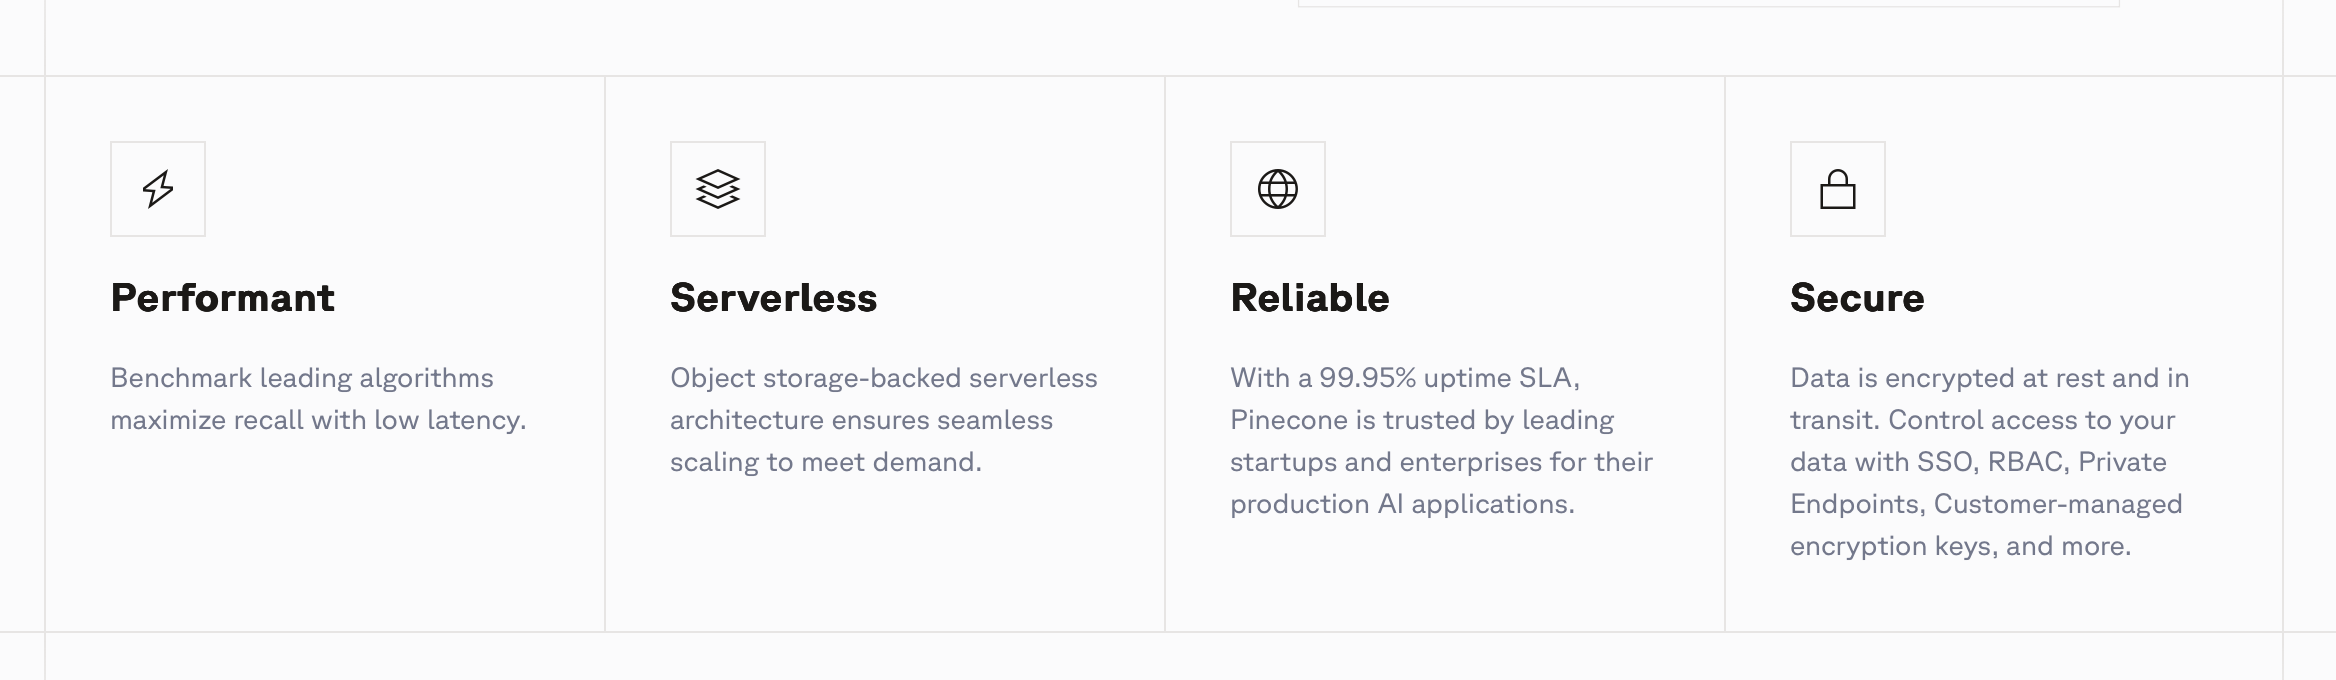

\

---

### **Outcome:**
- You will **set up the Pinecone vector database** to store and index **high-dimensional vectors**.
- You will learn how to add data to the database and use it to **perform semantic searches**.
- By using Pinecone, you will understand the power of **similarity search** and how it helps build context-aware applications like recommendation systems, personalized search engines, or AI-powered assistants.

This hands-on notebook provides the building blocks to implement **semantic search** in a real-world use case, such as comparing hospital records or querying large knowledge databases.

### **Step 1. Setup and Install Dependencies**

> Run the following cell to install **Pinecone**:

In [ ]:
! pip install pinecone

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 9.5 MB/s eta 0:00:00


### **Step 2. Imports and Configuration**

In [ ]:
import os
import pinecone

### **Step 3: Set Your Pinecone API Key**

To interact with **Pinecone**, you will need to use your **Pinecone API Key**. This key allows your application to communicate with Pinecone's vector database services.


#### **1. Create Your Pinecone Account and Get Your API Key:**

1. Go to the [Pinecone sign-up page](https://www.pinecone.io/start/).
2. Register for a free account.
3. Once you are logged in, obtain your API key from the Pinecone dashboard.

#### **2. Generate a New API Key**

To generate a new API key for your project:

1. **Go to the "API Keys" section** in your Pinecone Dashboard.

   - You will find an option called **"Create API Key"**.

2. **Click on the "Create API Key" button** to start the process of generating your new key.


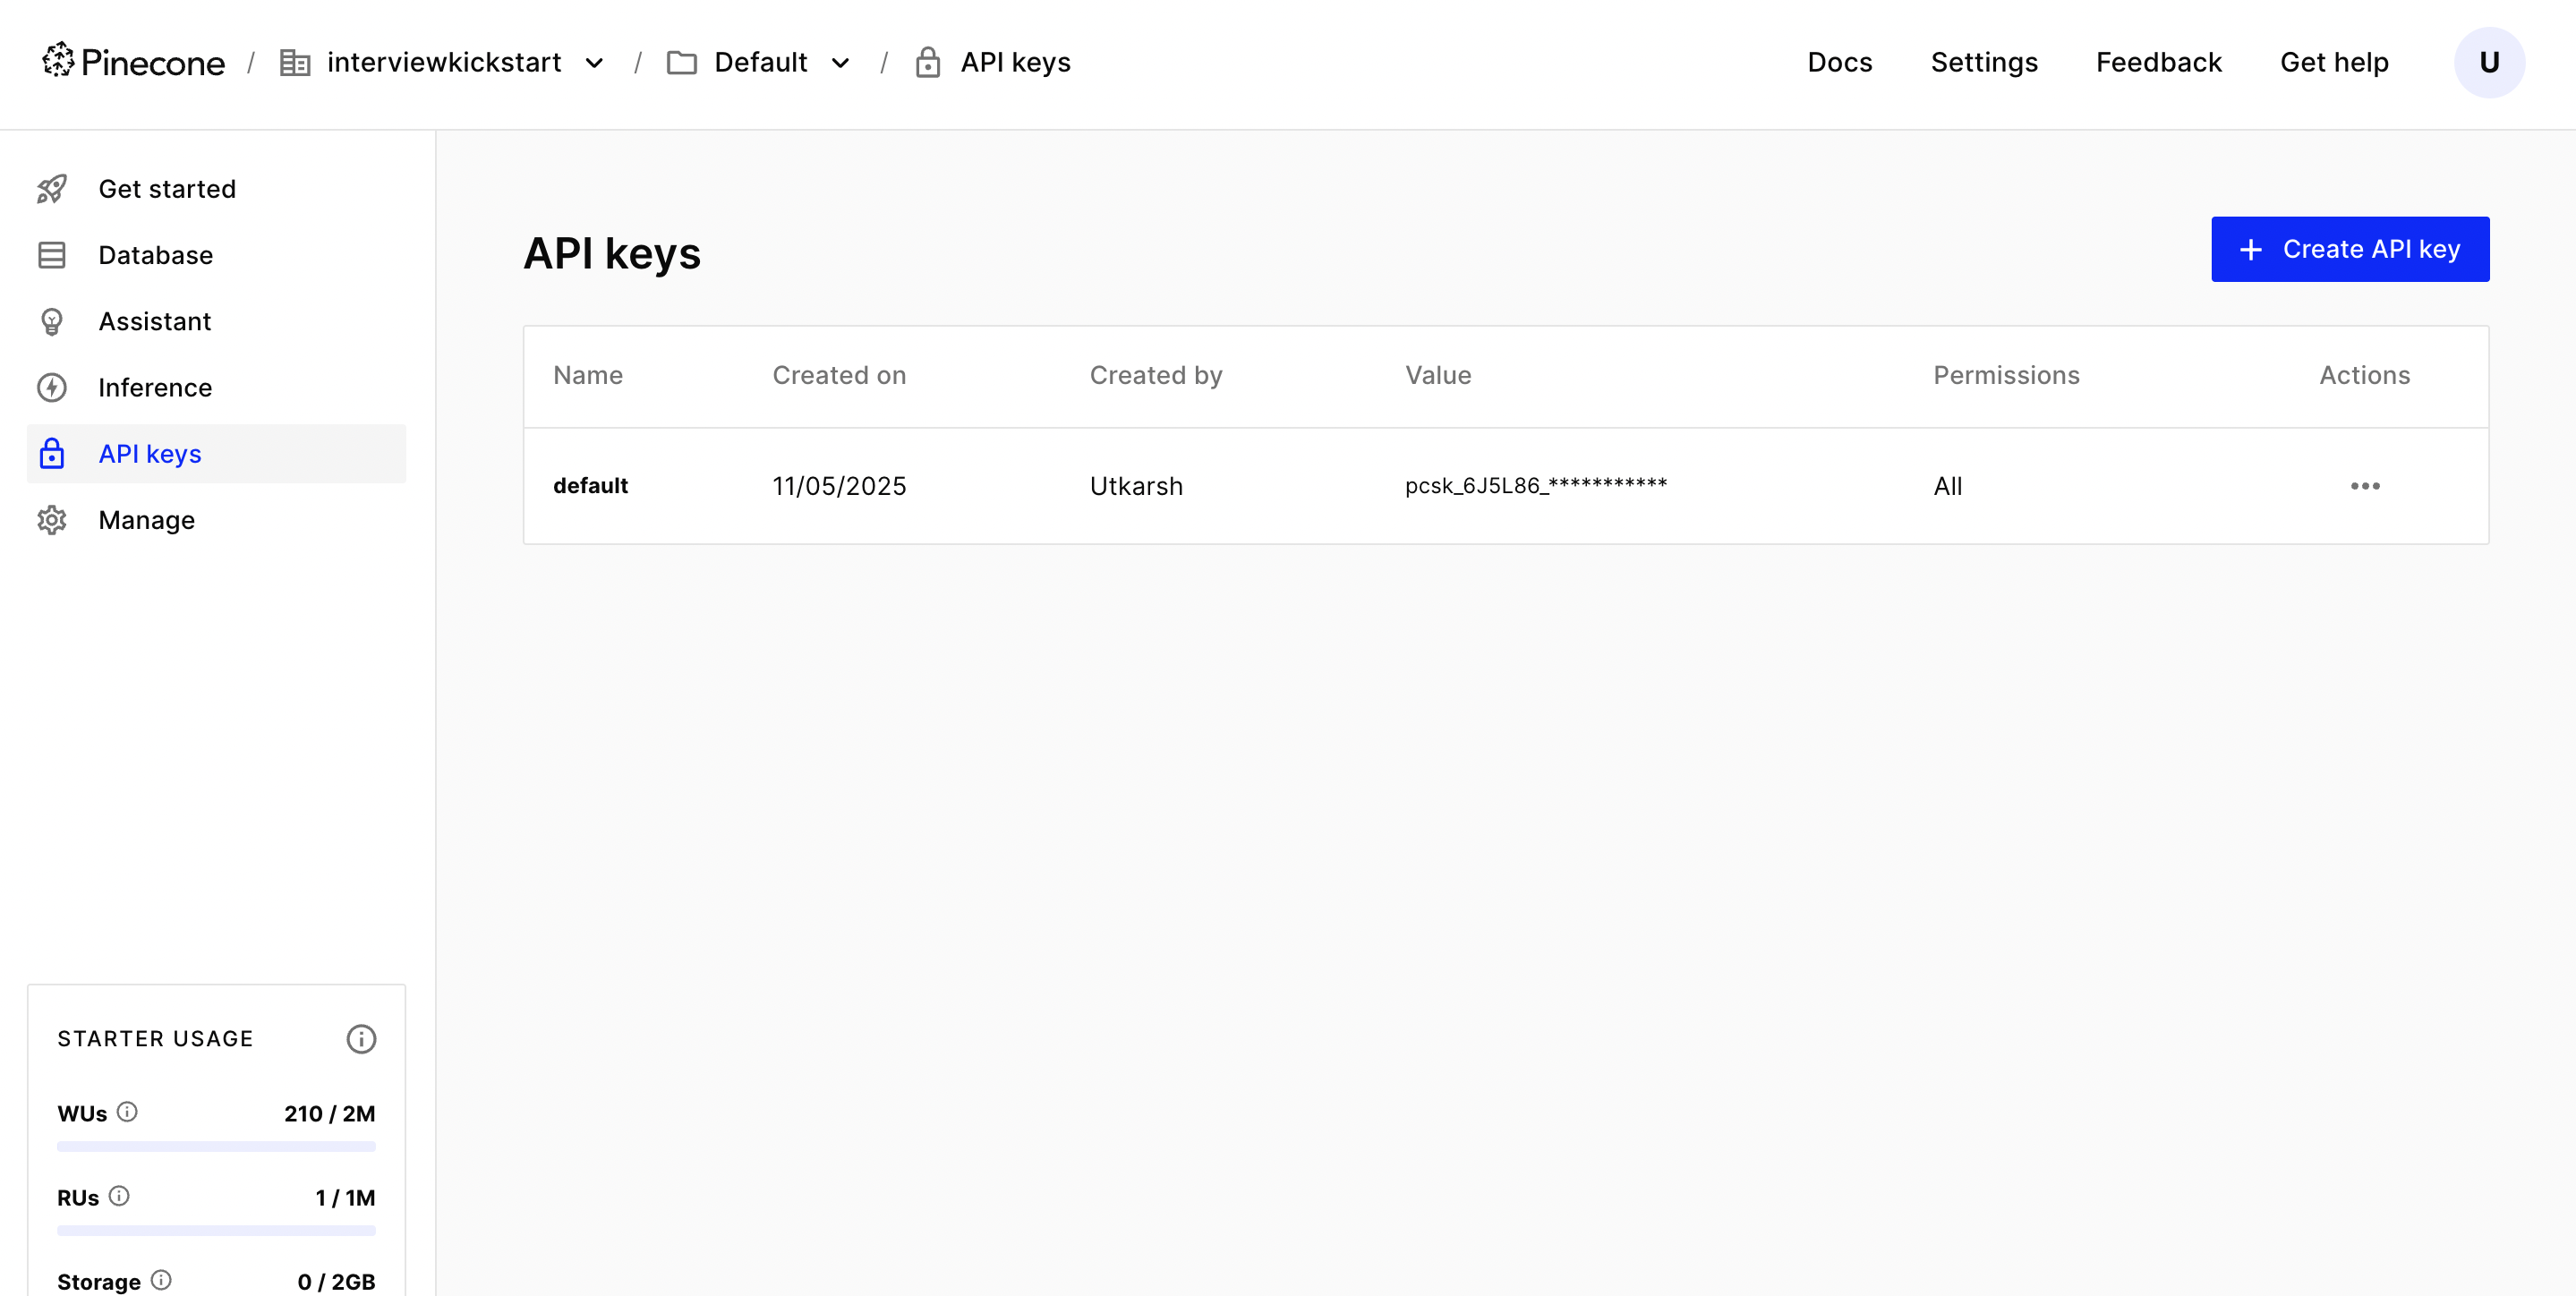

#### **3. Configure API Key Name and Permissions**

1. **API Key Name**: Provide a name for your API key (e.g., `New-Project`).
2. **Permissions**: Choose permissions for the API key. For most use cases, you can select **All** permissions.

   - Once you specify the name and permissions, click on **Create Key**.


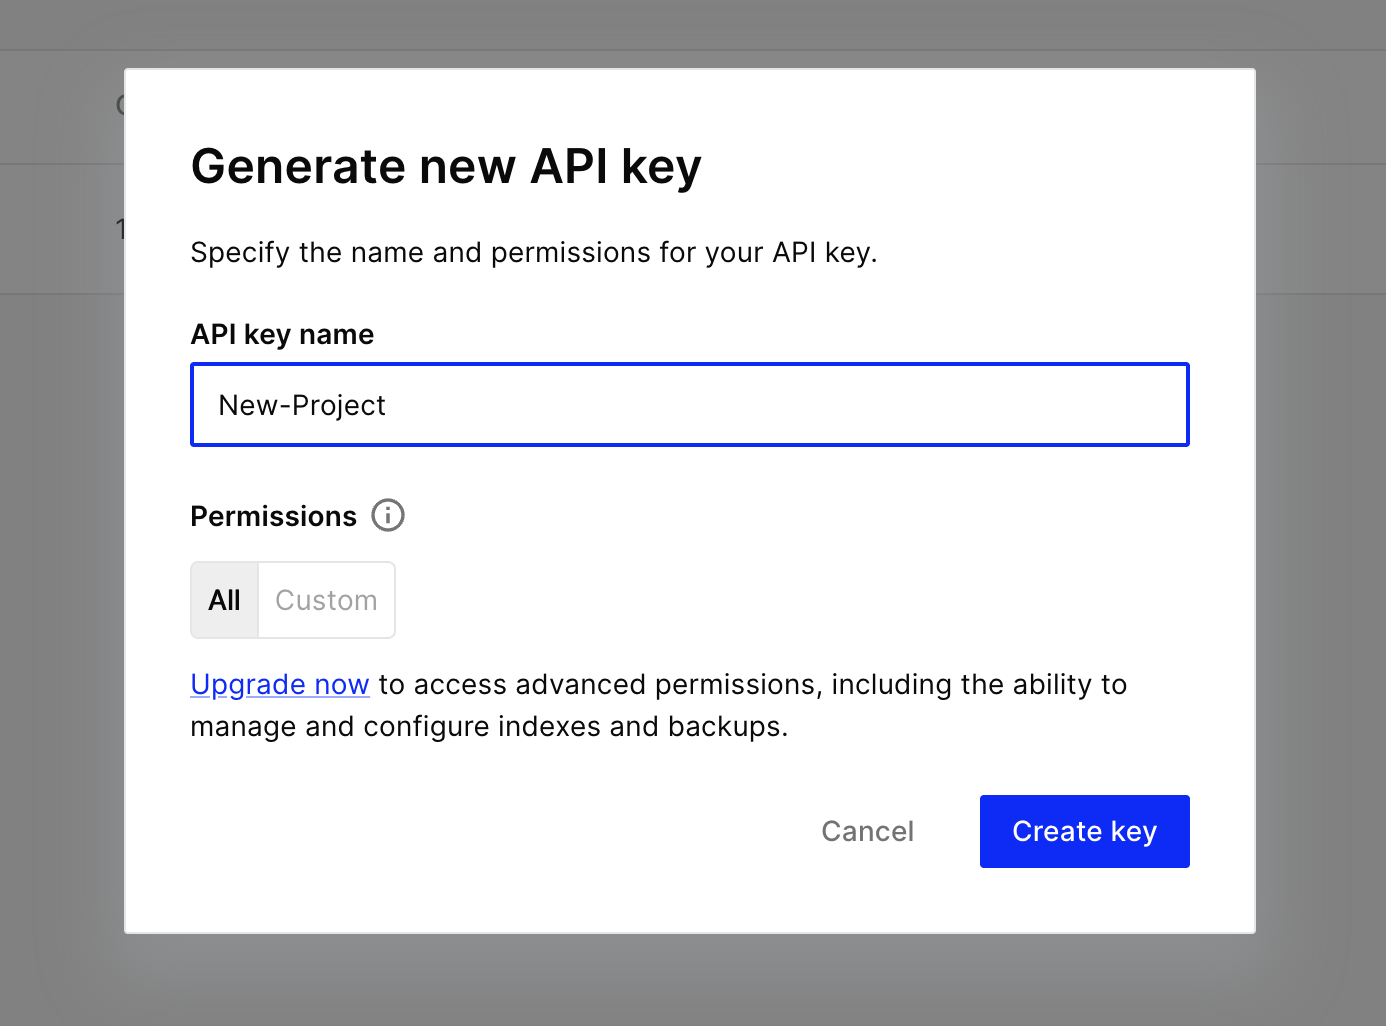

#### **4. API Key Generated**

After clicking **Create Key**, your new API key will be generated.

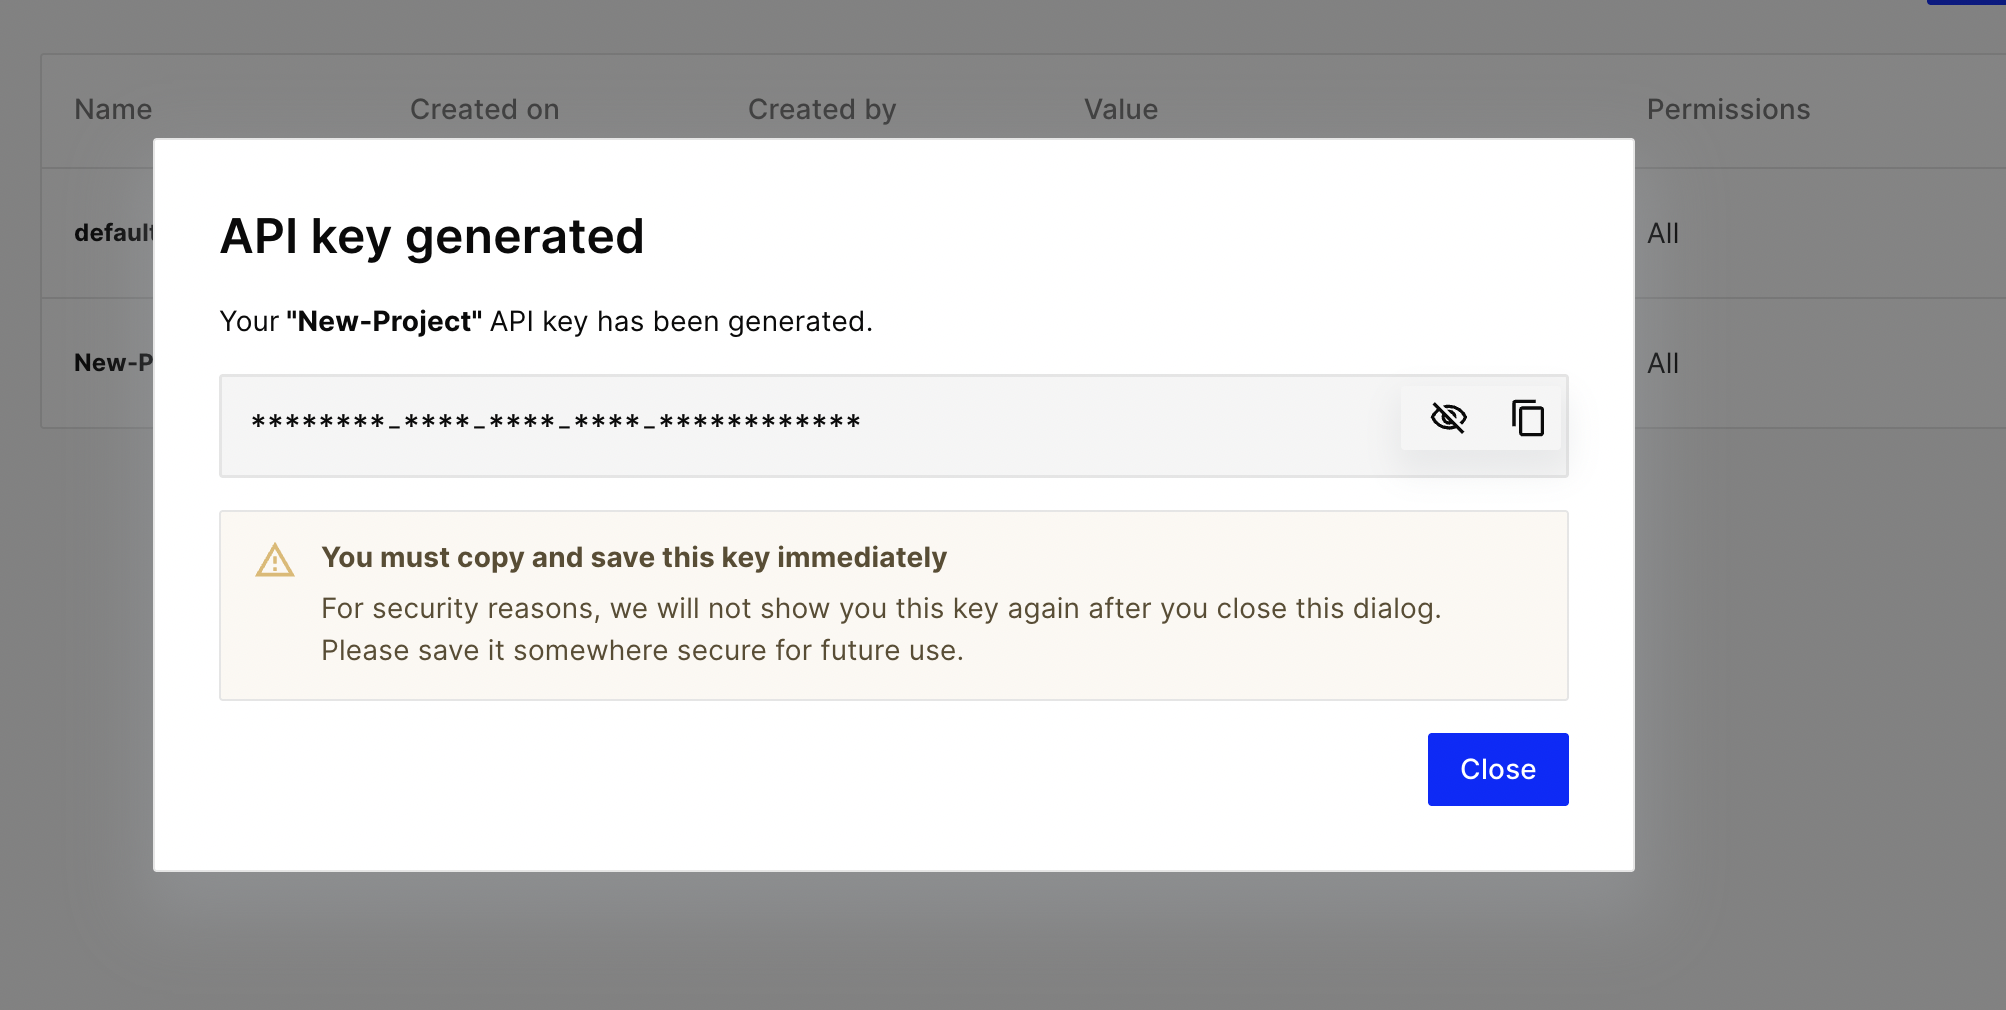

In [ ]:
# Set API keys
pinecone_api_key = 'your-free-pinecone-api-key'

> **Important**: Copy and securely store your API key immediately because **it will not be shown again** for security reasons.

### **Step 4: Create the Pinecone Index**

> Here, we create an index in Pinecone. An index is a place where we store the vector data (such as text embeddings). This index allows us to query the stored data efficiently.

In [ ]:
index_name = 'ik-vector-index'

from pinecone import (
    Pinecone,
    CloudProvider,
    AwsRegion,
    EmbedModel,
    IndexEmbed
)

# 1. Instantiate the Pinecone client
pc = Pinecone(api_key=pinecone_api_key)

# 2. Create an index configured for use with a particular model

if not pc.has_index(index_name):
    pc.create_index_for_model(
        name=index_name,
        cloud="aws",
        region="us-east-1",
        embed={
            "model":"llama-text-embed-v2",
            "field_map":{"text": "chunk_text"}
        }
    )


### **Step 5: Add Sample Data to Pinecone**
> Now, we will add some sample records (such as text sentences) to the Pinecone index. These records will later be used for semantic search.

In [ ]:
records = [
    { "_id": "rec1", "chunk_text": "The Eiffel Tower was completed in 1889 and stands in Paris, France.", "category": "history" },
    { "_id": "rec2", "chunk_text": "Photosynthesis allows plants to convert sunlight into energy.", "category": "science" },
    { "_id": "rec3", "chunk_text": "Albert Einstein developed the theory of relativity.", "category": "science" },
    { "_id": "rec4", "chunk_text": "The mitochondrion is often called the powerhouse of the cell.", "category": "biology" },
    { "_id": "rec5", "chunk_text": "Shakespeare wrote many famous plays, including Hamlet and Macbeth.", "category": "literature" },
    { "_id": "rec6", "chunk_text": "Water boils at 100°C under standard atmospheric pressure.", "category": "physics" },
    { "_id": "rec7", "chunk_text": "The Great Wall of China was built to protect against invasions.", "category": "history" },
    { "_id": "rec8", "chunk_text": "Honey never spoils due to its low moisture content and acidity.", "category": "food science" },
    { "_id": "rec9", "chunk_text": "The speed of light in a vacuum is approximately 299,792 km/s.", "category": "physics" },
    { "_id": "rec10", "chunk_text": "Newton’s laws describe the motion of objects.", "category": "physics" },
    { "_id": "rec11", "chunk_text": "The human brain has approximately 86 billion neurons.", "category": "biology" },
    { "_id": "rec12", "chunk_text": "The Amazon Rainforest is one of the most biodiverse places on Earth.", "category": "geography" },
    { "_id": "rec13", "chunk_text": "Black holes have gravitational fields so strong that not even light can escape.", "category": "astronomy" },
    { "_id": "rec14", "chunk_text": "The periodic table organizes elements based on their atomic number.", "category": "chemistry" },
    { "_id": "rec15", "chunk_text": "Leonardo da Vinci painted the Mona Lisa.", "category": "art" },
    { "_id": "rec16", "chunk_text": "The internet revolutionized communication and information sharing.", "category": "technology" },
    { "_id": "rec17", "chunk_text": "The Pyramids of Giza are among the Seven Wonders of the Ancient World.", "category": "history" },
    { "_id": "rec18", "chunk_text": "Dogs have an incredible sense of smell, much stronger than humans.", "category": "biology" },
    { "_id": "rec19", "chunk_text": "The Pacific Ocean is the largest and deepest ocean on Earth.", "category": "geography" },
    { "_id": "rec20", "chunk_text": "Chess is a strategic game that originated in India.", "category": "games" },
    { "_id": "rec21", "chunk_text": "The Statue of Liberty was a gift from France to the United States.", "category": "history" },
    { "_id": "rec22", "chunk_text": "Coffee contains caffeine, a natural stimulant.", "category": "food science" },
    { "_id": "rec23", "chunk_text": "Thomas Edison invented the practical electric light bulb.", "category": "inventions" },
    { "_id": "rec24", "chunk_text": "The moon influences ocean tides due to gravitational pull.", "category": "astronomy" },
    { "_id": "rec25", "chunk_text": "DNA carries genetic information for all living organisms.", "category": "biology" },
    { "_id": "rec26", "chunk_text": "Rome was once the center of a vast empire.", "category": "history" },
    { "_id": "rec27", "chunk_text": "The Wright brothers pioneered human flight in 1903.", "category": "inventions" },
    { "_id": "rec28", "chunk_text": "Bananas are a good source of potassium.", "category": "nutrition" },
    { "_id": "rec29", "chunk_text": "The stock market fluctuates based on supply and demand.", "category": "economics" },
    { "_id": "rec30", "chunk_text": "A compass needle points toward the magnetic north pole.", "category": "navigation" },
    { "_id": "rec31", "chunk_text": "The universe is expanding, according to the Big Bang theory.", "category": "astronomy" },
    { "_id": "rec32", "chunk_text": "Elephants have excellent memory and strong social bonds.", "category": "biology" },
    { "_id": "rec33", "chunk_text": "The violin is a string instrument commonly used in orchestras.", "category": "music" },
    { "_id": "rec34", "chunk_text": "The heart pumps blood throughout the human body.", "category": "biology" },
    { "_id": "rec35", "chunk_text": "Ice cream melts when exposed to heat.", "category": "food science" },
    { "_id": "rec36", "chunk_text": "Solar panels convert sunlight into electricity.", "category": "technology" },
    { "_id": "rec37", "chunk_text": "The French Revolution began in 1789.", "category": "history" },
    { "_id": "rec38", "chunk_text": "The Taj Mahal is a mausoleum built by Emperor Shah Jahan.", "category": "history" },
    { "_id": "rec39", "chunk_text": "Rainbows are caused by light refracting through water droplets.", "category": "physics" },
    { "_id": "rec40", "chunk_text": "Mount Everest is the tallest mountain in the world.", "category": "geography" },
    { "_id": "rec41", "chunk_text": "Octopuses are highly intelligent marine creatures.", "category": "biology" },
    { "_id": "rec42", "chunk_text": "The speed of sound is around 343 meters per second in air.", "category": "physics" },
    { "_id": "rec43", "chunk_text": "Gravity keeps planets in orbit around the sun.", "category": "astronomy" },
    { "_id": "rec44", "chunk_text": "The Mediterranean diet is considered one of the healthiest in the world.", "category": "nutrition" },
    { "_id": "rec45", "chunk_text": "A haiku is a traditional Japanese poem with a 5-7-5 syllable structure.", "category": "literature" },
    { "_id": "rec46", "chunk_text": "The human body is made up of about 60% water.", "category": "biology" },
    { "_id": "rec47", "chunk_text": "The Industrial Revolution transformed manufacturing and transportation.", "category": "history" },
    { "_id": "rec48", "chunk_text": "Vincent van Gogh painted Starry Night.", "category": "art" },
    { "_id": "rec49", "chunk_text": "Airplanes fly due to the principles of lift and aerodynamics.", "category": "physics" },
    { "_id": "rec50", "chunk_text": "Renewable energy sources include wind, solar, and hydroelectric power.", "category": "energy" }
]

In [ ]:
# Target the index
index = pc.Index(index_name)

# Upsert the records into a namespace
index.upsert_records("example-namespace", records)


In [ ]:
# View stats for the index
# You can also check the stats of your index, such as the number of records and other important information.
stats = index.describe_index_stats()
print(stats)

{'dimension': 1024,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'example-namespace': {'vector_count': 50}},
 'total_vector_count': 50,
 'vector_type': 'dense'}


### **Step 6: Query Pinecone for Similar Records**

> Now that we have uploaded data, we can perform a semantic search to find similar records based on vector similarity. This search will not rely on exact keyword matches, but rather on the meaning of the query.

In [ ]:
# Define the query
query = "Famous historical structures and monuments"

# Search the dense index
results = index.search(
    namespace="example-namespace",
    query={
        "top_k": 10,
        "inputs": {
            'text': query
        }
    }
)

# Print the results
for hit in results['result']['hits']:
        print(f"id: {hit['_id']:<5} | score: {round(hit['_score'], 2):<5} | category: {hit['fields']['category']:<10} | text: {hit['fields']['chunk_text']:<50}")


id: rec17 | score: 0.28  | category: history    | text: The Pyramids of Giza are among the Seven Wonders of the Ancient World.
id: rec38 | score: 0.19  | category: history    | text: The Taj Mahal is a mausoleum built by Emperor Shah Jahan.
id: rec5  | score: 0.18  | category: literature | text: Shakespeare wrote many famous plays, including Hamlet and Macbeth.
id: rec15 | score: 0.1   | category: art        | text: Leonardo da Vinci painted the Mona Lisa.          
id: rec50 | score: 0.09  | category: energy     | text: Renewable energy sources include wind, solar, and hydroelectric power.
id: rec1  | score: 0.08  | category: history    | text: The Eiffel Tower was completed in 1889 and stands in Paris, France.
id: rec26 | score: 0.08  | category: history    | text: Rome was once the center of a vast empire.        
id: rec7  | score: 0.08  | category: history    | text: The Great Wall of China was built to protect against invasions.
id: rec47 | score: 0.07  | category: history    | t

> #### **Explanation:**
- The query "Famous historical monuments" is used to find the most relevant records in the index.
- The top_k parameter specifies how many results to retrieve.
- The results are returned based on vector similarity, meaning the records that are semantically closest to the query.

### **Resources**

1. **Pinecone Documentation**  
   [Pinecone Docs](https://docs.pinecone.io/)  
   Dive deeper into Pinecone’s **vector search capabilities**, including advanced features like **vector retrieval**, **metadata handling**, and **scalability**.

2. **LangChain Documentation**  
   [LangChain Docs](https://python.langchain.com/docs/)  
   Learn how to integrate **LangChain** with **Pinecone** to build **intelligent agents** and workflows using **large language models (LLMs)**.

3. **OpenAI API Documentation**  
   [OpenAI API Docs](https://platform.openai.com/docs/)  
   Explore how **OpenAI models** can be used with **Pinecone** to enable advanced **semantic search** and **generation tasks**.

4. **Retrieval-Augmented Generation (RAG)**  
   [RAG Overview](https://www.promptingguide.ai/research/rag.en#introduction-to-rag)  
   Learn how **RAG** (combining **retrieval** and **generation**) can enhance the capabilities of your AI models.

---
#  -----------------------------------------------------  **THANK YOU** ------------------------------------------------------------


---